In [3]:
import os

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
%matplotlib inline

In [34]:
orig_df = pd.read_excel("Assignment3_cluster2.xlsx",sheet_name='2555')
orig_df.head()

,ministry,personnel,operation,invest,subsidy,others
0,a,22566.0,71644.0,56100.0,141001.1,130900.0
1,b,3217.4,1828.4,573.2,5916.4,10588.3
2,c,77369.0,18159.5,4783.0,2901.8,65454.1
3,d,10136.3,6052.8,1374.6,428.0,173423.4
4,e,2664.6,2199.2,750.9,869.6,1095.5


<AxesSubplot:>

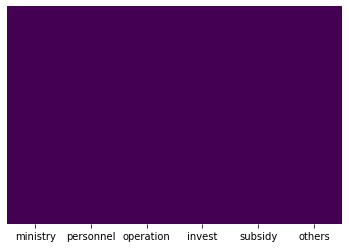

In [35]:
sns.heatmap(orig_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [36]:
orig_df.describe()

,personnel,operation,invest,subsidy,others
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,24895.040909,9432.195455,11278.668182,24773.863636,19463.236364
std,51391.747496,15686.899224,20673.712183,58782.199990,45752.274902
min,327.500000,419.200000,155.400000,21.000000,48.700000
25%,1873.650000,1170.800000,496.175000,640.325000,604.425000
50%,5283.500000,3102.500000,1256.900000,2539.550000,1457.800000
75%,20386.275000,11699.025000,9394.250000,6667.975000,4939.275000
max,231752.800000,71644.000000,78101.900000,221522.900000,173423.400000


In [37]:
orig_df.columns

Index(['ministry', 'personnel', 'operation', 'invest', 'subsidy', 'others'], dtype='object')

In [38]:
df = orig_df[['personnel','operation','invest', 'subsidy','others']]
df

,personnel,operation,invest,subsidy,others
0,22566.0,71644.0,56100.0,141001.1,130900.0
1,3217.4,1828.4,573.2,5916.4,10588.3
2,77369.0,18159.5,4783.0,2901.8,65454.1
3,10136.3,6052.8,1374.6,428.0,173423.4
4,2664.6,2199.2,750.9,869.6,1095.5
5,1157.6,951.6,2972.6,3579.6,1603.1
6,2189.2,3796.8,567.8,3288.6,358.7
7,22109.0,12343.3,38779.2,2177.3,1312.5
8,8055.5,2100.7,78101.9,32.6,562.0
9,8287.0,5451.9,9020.3,439.6,2386.2


In [39]:
scaler = MinMaxScaler() 
array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4
0,0.096094,1.000000,0.717731,0.636474,0.754731
1,0.012487,0.019785,0.005360,0.026616,0.060791
2,0.332900,0.249075,0.059369,0.013006,0.377249
3,0.042384,0.079096,0.015641,0.001837,1.000000
4,0.010099,0.024991,0.007640,0.003831,0.006038


In [40]:
df_normalized.describe()

,0,1,2,3,4
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,0.106158,0.126543,0.142704,0.111750,0.111980
std,0.222066,0.220245,0.265230,0.265380,0.263892
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006681,0.010553,0.004372,0.002796,0.003205
50%,0.021415,0.037674,0.014131,0.011370,0.008127
75%,0.086675,0.158369,0.118528,0.030009,0.028208
max,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'SSE')

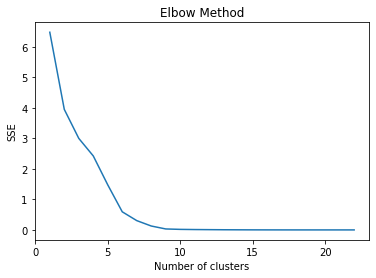

In [41]:
max_k = 23
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [42]:
k = 6
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_normalized)

KMeans(n_clusters=6)

In [43]:
cluster_predictions = kmeans.predict(df_normalized)
df['cluster_id'] = cluster_predictions
df

,personnel,operation,invest,subsidy,others,cluster_id
0,22566.0,71644.0,56100.0,141001.1,130900.0,1
1,3217.4,1828.4,573.2,5916.4,10588.3,0
2,77369.0,18159.5,4783.0,2901.8,65454.1,0
3,10136.3,6052.8,1374.6,428.0,173423.4,3
4,2664.6,2199.2,750.9,869.6,1095.5,0
5,1157.6,951.6,2972.6,3579.6,1603.1,0
6,2189.2,3796.8,567.8,3288.6,358.7,0
7,22109.0,12343.3,38779.2,2177.3,1312.5,4
8,8055.5,2100.7,78101.9,32.6,562.0,4
9,8287.0,5451.9,9020.3,439.6,2386.2,0


In [44]:
df.cluster_id.value_counts()

0    16
4     2
5     1
3     1
2     1
1     1
Name: cluster_id, dtype: int64

In [45]:
print(metrics.davies_bouldin_score(df,kmeans.labels_))

0.33715199673324964


In [46]:
df[df.cluster_id==0].mean()

personnel     14865.82500
operation      4817.48750
invest         2201.96875
subsidy        3139.60000
others         5700.17500
cluster_id        0.00000
dtype: float64

In [47]:
df.to_csv('cluster_res_kmean55.csv')